<h2>2020 Phase-1 Data Science and Machine Learning</h2>

In this assessment of data science and machine learning, two tasks are performed using python. These are as follows:
1. Data Collection
2. Data Modelling and analysis



x----------------------------------------------------------------------------------------------------------------------------x

<h2>Part-1  Data Collection - API Calling</h2>

In this part, a request is send to API named https://koordinates.com/ . 
This fetches information of population census for the year 2018 for a specific co-ordinates. 
Technology used - Python

In [3]:
#Importing the required python libraries for our task of API Request and data collection. 

import json
import sys
sys.path.append(r'D:\Microsoft_student_acc\2020-Phase-1\Data Science and Machine Learning')

import pandas as pd
pd.options.mode.chained_assignment = None
import requests

<h4>Creating Function for API request</h4>

The function name is get_census. This function takes Longitude and latitude as inpurt parameters and returns Statistical Area 1 and Census Population from the respective API. 

The params contains mandatory parameters which are needed to passed along with the request to API

In [4]:
#The function below is for API requests

def get_census(coordinates):
    
    url = 'https://koordinates.com/services/query/v1/vector.json?'

    params = {
        'key' : 'fce42e7251c94d5aa36a6f05133b9484',
        'layer' : 104612,
        'y':coordinates[0],
        'x':coordinates[1]
        
    }

    response = requests.get(url, params=params)
    
    if response.status_code != 200:
        return response.status_code
    sa1= response.json()["vectorQuery"]["layers"]["104612"]["features"][0]["properties"]["SA12018_V1_00"]
    cur18 = response.json()["vectorQuery"]["layers"]["104612"]["features"][0]["properties"]["C18_CURPop"]
    return sa1,cur18     


In [5]:
#Testing our function created in previous cell

get_census((-37.0129205,174.9040694))

('7009770', 174)

As you can see, the function takes latitude and longitude as input and returns two values in tuple - ('Statistical Area 1', Census 2018)

In [6]:
#Importing our assignment data set from our local


Df_Assignmnt = pd.read_csv(r'D:\Microsoft_student_acc\2020-Phase-1\Data_Science_and_Machine_Learning\Properties.csv.csv')

The Df_Assignment is data frame formed from data set which was provided already. 

In [7]:
#Lets check our data frame to visualize the structure of it and to ensure that it is imported correctly.

Df_Assignmnt.head()

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa
1,5,3.0,"8 Corsica Way Karaka, Auckland",564,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park





<h3>Applying Census Function for Each Latitude and Longitude In Data set</h3>

In our data set above, the latitude and longitude columns are given seperately. We have to send API requests for each attribute in order to retreive population census for each. 

Hence we apply get_census function for each record of data set using apply function.

1. Combine latitude and Longitude into one column which contains tuple (latitude, longitude)

In [9]:
#Function for combining latitude and longitude into one tuple column for implementing get_census function
def combine_lat_lng(lat,lng):
    return (lat,lng)

#Using Lambda for combining the latitude and longitude columns. The 'Combined Output' column would contain tuples of Latitude
#longitude

Df_Assignmnt['Combined_output'] = Df_Assignmnt.apply(lambda row: combine_lat_lng(row['Latitude'], row['Longitude']), axis = 1)

In [10]:
Df_Assignmnt.head()

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,Combined_output
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa,"(-37.0129205, 174.90406940000003)"
1,5,3.0,"8 Corsica Way Karaka, Auckland",564,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka,"(-37.0636724, 174.9229121)"
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka,"(-37.063579700000005, 174.9240444)"
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga,"(-36.9129964, 174.78742490000002)"
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park,"(-36.979036900000004, 174.8926119)"


The Last column of our data frame is <b>Combined_output</b> meaning it was created successfully. We can tally the values by refering original columns Latitude and Longitude

In [11]:
# Implementing get_census function for all values of Combined_output using apply function. This will return a tupple containing 
# values - ('SA1',Census_2018) for each record and form a seperate column named - 'combined_SA1_census'

Df_Assignmnt['combined_SA1_Census'] = Df_Assignmnt.Combined_output.apply(get_census)

In [12]:
Df_Assignmnt.head()

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,Combined_output,combined_SA1_Census
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa,"(-37.0129205, 174.90406940000003)","(7009770, 174)"
1,5,3.0,"8 Corsica Way Karaka, Auckland",564,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka,"(-37.0636724, 174.9229121)","(7009991, 129)"
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka,"(-37.063579700000005, 174.9240444)","(7009991, 129)"
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga,"(-36.9129964, 174.78742490000002)","(7007871, 120)"
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park,"(-36.979036900000004, 174.8926119)","(7008902, 231)"


The last column of our data frame is - 'combined_SA1_Census' which contains the values of SA1 and Census_2018. Now we will break these tuples to form two seperate column for each value namely - SA1 and CU18. 

The column is broken into a new data frame which will later be merged with original data frame to form a final data frame.

Also, the combined_output column can be dropped now as it is no longer required.

In [13]:
#Breaking the tuples into seperate lists and forming new Data Frame - Df_Assignmnt_census. This will later be merged with 
# Df_Assignmnt to form final data frame.

Df_Assignmnt_census=pd.DataFrame(Df_Assignmnt['combined_SA1_Census'].tolist(), index=Df_Assignmnt.index)
Df_Assignmnt_census = Df_Assignmnt_census.rename(columns = {Df_Assignmnt_census.columns[0]:"SA1",Df_Assignmnt_census.columns[1]:"CU18"} )
Df_Assignmnt_census.head()

,SA1,CU18
0,7009770,174
1,7009991,129
2,7009991,129
3,7007871,120
4,7008902,231


We now have a new Data frame - Df_Assignmnt_census which contains two columns SA1 and CU18.

In [14]:
#Merging Df_Assignmnt and Df_Assignmnt_census

Df_Assignmnt_1 = Df_Assignmnt.merge(Df_Assignmnt_census, left_on='SA1', right_on='SA1')

ValueError: You are trying to merge on int64 and object columns. If you wish to proceed you should use pd.concat

Oops ! error occured. But why ?

This occured because - the SA1 column in Df_Assignmnt has int64 data type where as in Df_Assignmnt_census is of object data type (as it returns JSON object value from API). 

Solution: Converting object data type to int64 for merging

In [15]:
Df_Assignmnt.dtypes

Bedrooms                 int64
Bathrooms              float64
Address                 object
Land area               object
CV                       int64
Latitude               float64
Longitude              float64
SA1                      int64
0-19 years               int64
20-29 years              int64
30-39 years              int64
40-49 years              int64
50-59 years              int64
60+ years                int64
Suburbs                 object
Combined_output         object
combined_SA1_Census     object
dtype: object

In [16]:
Df_Assignmnt_census.dtypes

SA1     object
CU18     int64
dtype: object

Just to validate - We can see that SA1 is int64 in Df_Assignmnt while object in Df_Assignmnt_census

In [17]:
#Converting SA1 from object into int
Df_Assignmnt_census['SA1']=Df_Assignmnt_census['SA1'].astype(int)

#Merging again after corrections in order to rectify error
Df_Assignmnt_1 = Df_Assignmnt.merge(Df_Assignmnt_census, left_on='SA1', right_on='SA1')

The error is now gone. 

In [18]:
Df_Assignmnt_1.head()

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,Combined_output,combined_SA1_Census,CU18
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa,"(-37.0129205, 174.90406940000003)","(7009770, 174)",174
1,5,3.0,"8 Corsica Way Karaka, Auckland",564,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka,"(-37.0636724, 174.9229121)","(7009991, 129)",129
2,5,3.0,"8 Corsica Way Karaka, Auckland",564,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka,"(-37.0636724, 174.9229121)","(7009991, 129)",129
3,6,4.0,"243 Harbourside Drive Karaka, Auckland",626,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka,"(-37.063579700000005, 174.9240444)","(7009991, 129)",129
4,6,4.0,"243 Harbourside Drive Karaka, Auckland",626,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka,"(-37.063579700000005, 174.9240444)","(7009991, 129)",129


The SA1 is merged into one column wheras a seperate column of CU18 is created at the end corresponding to each SA1 value. 

In [20]:
Df_Assignmnt_1.shape

(1401, 18)

The second thing which we need to combine is Depriviation Index. As per instruction, 2018 version of data set was obtained from
https://www.otago.ac.nz/wellington/departments/publichealth/research/hirp/otago020194.html. From this data set, we merged Depriviation index column into our data frame (Df_Assignmnt_1) and the key is SA1. 

First lets read the data into a data frame.

In [22]:
#Depriviation index data set is read from local file into data frame.

Df_DepIndx = pd.read_csv(r'D:\Microsoft_student_acc\2020-Phase-1\Data_Science_and_Machine_Learning\NZ_DepIndx_2018.csv')

Df_DepIndx.head()

,SA12018_code,NZDep2018,NZDep2018_Score,URPopnSA1_2018,SA22018_code,SA22018_name
0,7000000,10.0,1245.0,141,100100,North Cape
1,7000001,10.0,1245.0,114,100100,North Cape
2,7000002,NaN,NaN,0,100300,Inlets Far North District
3,7000003,10.0,1207.0,225,100100,North Cape
4,7000004,9.0,1093.0,138,100100,North Cape


From the above data frame, we have to merge NZDep2018 column into our initial data frame.

The merging will be done on SA1 or SA12018_code(here)

Since we require just two columns, we can remove all other columns. 

In [23]:
#Creating a new data frame with only necessary columns required for merge.

Df_DepIndx_Reduced = Df_DepIndx.filter(['SA12018_code','NZDep2018'], axis=1)
Df_DepIndx_Reduced.head()

,SA12018_code,NZDep2018
0,7000000,10.0
1,7000001,10.0
2,7000002,NaN
3,7000003,10.0
4,7000004,9.0


Now merging the two data frames to form one final data set which we will use in part 2 of our assessment. 

In [24]:
#merging depriviation index into our initial data frame to form final data frame.

Df_Assignmnt_final = Df_Assignmnt_1.merge(Df_DepIndx_Reduced, left_on='SA1', right_on='SA12018_code')
Df_Assignmnt_final.head()

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,Combined_output,combined_SA1_Census,CU18,SA12018_code,NZDep2018
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa,"(-37.0129205, 174.90406940000003)","(7009770, 174)",174,7009770,6.0
1,5,3.0,"8 Corsica Way Karaka, Auckland",564,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka,"(-37.0636724, 174.9229121)","(7009991, 129)",129,7009991,1.0
2,5,3.0,"8 Corsica Way Karaka, Auckland",564,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka,"(-37.0636724, 174.9229121)","(7009991, 129)",129,7009991,1.0
3,6,4.0,"243 Harbourside Drive Karaka, Auckland",626,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka,"(-37.063579700000005, 174.9240444)","(7009991, 129)",129,7009991,1.0
4,6,4.0,"243 Harbourside Drive Karaka, Auckland",626,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka,"(-37.063579700000005, 174.9240444)","(7009991, 129)",129,7009991,1.0


The above data set formed is our final data set. The last column is NZDep2018 which is depriviation index column. The data set will be applied with different various pre-processing steps such as dropping unnecessary columns, remvoing duplicate data etc. 

In [25]:
Df_Assignmnt_final.shape

(1401, 20)

<h2> Data Cleaning and Pre-Processing</h2>

<h4>Removing Duplicate Records</h4>

This is a data cleaning process. 
Checking for the duplicate records. The duplicate records are marked by true. The original or unique are marked as false. Duplicate record are un-necessary repetition which can be removed from our data set. 

In [26]:
Df_Assignmnt_final.duplicated(keep='first')

0       False
1       False
2        True
3       False
4        True
        ...  
1396    False
1397    False
1398    False
1399    False
1400    False
Length: 1401, dtype: bool

In [27]:
Df_Assignmnt_final_new = Df_Assignmnt_final.drop_duplicates()

In [28]:
Df_Assignmnt_final_new.duplicated(keep='first')

0       False
1       False
3       False
5       False
6       False
        ...  
1396    False
1397    False
1398    False
1399    False
1400    False
Length: 1043, dtype: bool

All the true( duplicated records) are removed from data set. The total records left now are 1403.

<h4>Dropping Columns</h4>

Also, some columns in our data set are not useful in any prediction and projection and can be dropped. Hence we drop such columns. In our data set we are dropping four columns in pre-processing phase which are as follows:

1. Combined_output     - This column is not part of orignal data set but was a provisonal column created for fetching Census.                            Hence it has no use in our modelling and analysis.
2. SA12018_code        - This column was added while merging Depriviation Index on SA1 key. This is a duplicate column of SA1.                            Hence it is removed.
3. combined_SA1_Census - This column is not part of orignal data set but was a provisonal column created for fetching Census.                            Hence it has no use in our modelling and analysis.
4. Address             - The Address column is unique identity provided for each property and it has no relevance in                                      predicting or analysing the housing prices. Hence it would be wise to drop such columns.
                    

In [29]:
#Dropping the columns

Df_Assignmnt_final_new.drop('Combined_output',axis=1,inplace=True)
Df_Assignmnt_final_new.drop('SA12018_code',axis=1,inplace=True)
Df_Assignmnt_final_new.drop('combined_SA1_Census',axis=1,inplace=True)
Df_Assignmnt_final_new.drop('Address',axis=1,inplace=True)

Df_Assignmnt_final_new.head()

,Bedrooms,Bathrooms,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,CU18,NZDep2018
0,5,3.0,714,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa,174,6.0
1,5,3.0,564,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka,129,1.0
3,6,4.0,626,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka,129,1.0
5,2,1.0,65,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga,120,2.0
6,3,1.0,601,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park,231,9.0


In [30]:
Df_Assignmnt_final_new.describe(include='all')

,Bedrooms,Bathrooms,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,CU18,NZDep2018
count,1043.000000,1041.000000,1043,1.043000e+03,1043.000000,1043.000000,1.043000e+03,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1042,1043.000000,1043.000000
unique,NaN,NaN,744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,189,NaN,NaN
top,NaN,NaN,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Remuera,NaN,NaN
freq,NaN,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59,NaN,NaN
mean,3.780441,2.073007,NaN,1.380546e+06,-36.893368,174.799023,7.006313e+06,47.542665,29.001918,27.025887,24.117929,22.599233,29.321189,NaN,179.896453,5.064238
std,1.172592,0.994432,NaN,1.162507e+06,0.130153,0.119779,2.591174e+03,24.739116,21.082827,17.999262,10.964718,10.222875,21.873643,NaN,71.199409,2.906194
min,1.000000,1.000000,NaN,2.700000e+05,-37.265021,174.317078,7.001130e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,3.000000,1.000000
25%,3.000000,1.000000,NaN,7.800000e+05,-36.950183,174.719666,7.004413e+06,33.000000,15.000000,15.000000,18.000000,15.000000,18.000000,NaN,138.000000,2.000000
50%,4.000000,2.000000,NaN,1.080000e+06,-36.893368,174.797892,7.006325e+06,45.000000,24.000000,24.000000,24.000000,21.000000,27.000000,NaN,174.000000,5.000000
75%,4.000000,3.000000,NaN,1.600000e+06,-36.855643,174.880944,7.008380e+06,57.000000,36.000000,33.000000,30.000000,27.000000,36.000000,NaN,208.500000,8.000000


<h4>Handling Null Values</h4>

Null Values or incomplete data can often effect the performance of model (specially regression). Hence they should be handled, NUll values can be of two kinds:

1. Unit Nonresponse -entire row missing/null
2. Item Nonresponse -one or two item missing from row

In [31]:
#Checking total number of null values for each columns

Df_Assignmnt_final_new.isnull().sum()

Bedrooms       0
Bathrooms      2
Land area      0
CV             0
Latitude       0
Longitude      0
SA1            0
0-19 years     0
20-29 years    0
30-39 years    0
40-49 years    0
50-59 years    0
60+ years      0
Suburbs        1
CU18           0
NZDep2018      0
dtype: int64

<h4>Approach to Handle null values</h4>

One approach for handling the null values can be to ignore the missing values or drop the rows containing missing data. This is because the number of null values in data set are not high. Out of 1043 records, only 3 have incomplete/missing data. 

However in our data set, certain obvious assumptions can help us to fill the missing values. The null values exist in two columns only - 
1. Bathrooms - 2 records have no data for bathrooms. Now it is obvious that no property will have zero bathroom. Also, with only                2 records out 1043 records which are missing we can fill these records with either mean or a general value of                    bathrooms(which is two).
2. Suburbs  - 1 record is missing from Subrubs column. These can be filled using address column. The address column also                       contains name of suburb which we can fill corressponding to address. In case address is also missing, we will drop               the record.

In [32]:
Df_Assignmnt_final_new['Bathrooms'] = Df_Assignmnt_final_new['Bathrooms'].fillna(2)

In [33]:
Df_Assignmnt_final_new['Suburbs'] = Df_Assignmnt_final_new['Suburbs'].fillna('Great Barrier Island (Aotea Island)')

In [34]:
Df_Assignmnt_final_new.isnull().sum()

Bedrooms       0
Bathrooms      0
Land area      0
CV             0
Latitude       0
Longitude      0
SA1            0
0-19 years     0
20-29 years    0
30-39 years    0
40-49 years    0
50-59 years    0
60+ years      0
Suburbs        0
CU18           0
NZDep2018      0
dtype: int64

We have replaced the null values of our data as discussed above. As we can see, there are no null values in any column

In [35]:
# Removing special symbols like $, m^2 etc from columns. In Land Area column, some data has m^2 suffix which needs to be removed
# for modelling and analysis. Hence removing the special symbol

Df_Assignmnt_final_new['Land area'] = Df_Assignmnt_final_new['Land area'].str.extract('(\d+)').astype('float')

In [36]:
Df_Assignmnt_final_new.dtypes

Bedrooms         int64
Bathrooms      float64
Land area      float64
CV               int64
Latitude       float64
Longitude      float64
SA1              int64
0-19 years       int64
20-29 years      int64
30-39 years      int64
40-49 years      int64
50-59 years      int64
60+ years        int64
Suburbs         object
CU18             int64
NZDep2018      float64
dtype: object

All columns are in integer or float data types except for Suburbs which is in object format. The Suburb column is in string form and needs to be converted to float/int. This can be done using label encoding or one hot encoding ( data pre-processing steps).

<h4>Encoding Strings into Categorical Data </h4>

Encoding the strings column - Suburbs into categorical data will help us in regression model fitting. Although before implementing models, we will find the co-relation between each column with our target column which is CV - Price of property.

<h4>Count Encoder</h4>
The cound encoder counts the occurence of each category and replaces the category with its count for each record. Example, if remuera suburb occurs 10 times then the value of remuera everywhere will be replaced with 10.

In [49]:
Df_Assignmnt_final_new.to_csv('Final_Dataset_part1.csv', index=False)

In [37]:
Df_Assignmnt_final_new['Suburbs']=Df_Assignmnt_final_new['Suburbs'].astype('str')

In [38]:
Df_encoded = Df_Assignmnt_final_new

In [39]:
from category_encoders.count import CountEncoder

cnt = CountEncoder()

Df_encoded['Suburbs'] = cnt.fit_transform(Df_encoded['Suburbs'])

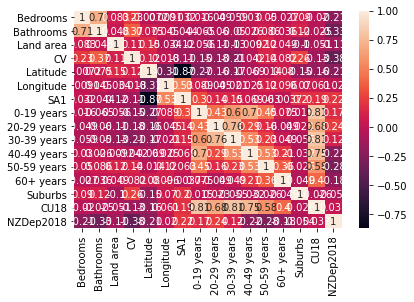

In [40]:
import seaborn as sns

corrMatrix = Df_encoded.corr()
sns.heatmap(corrMatrix, annot=True)

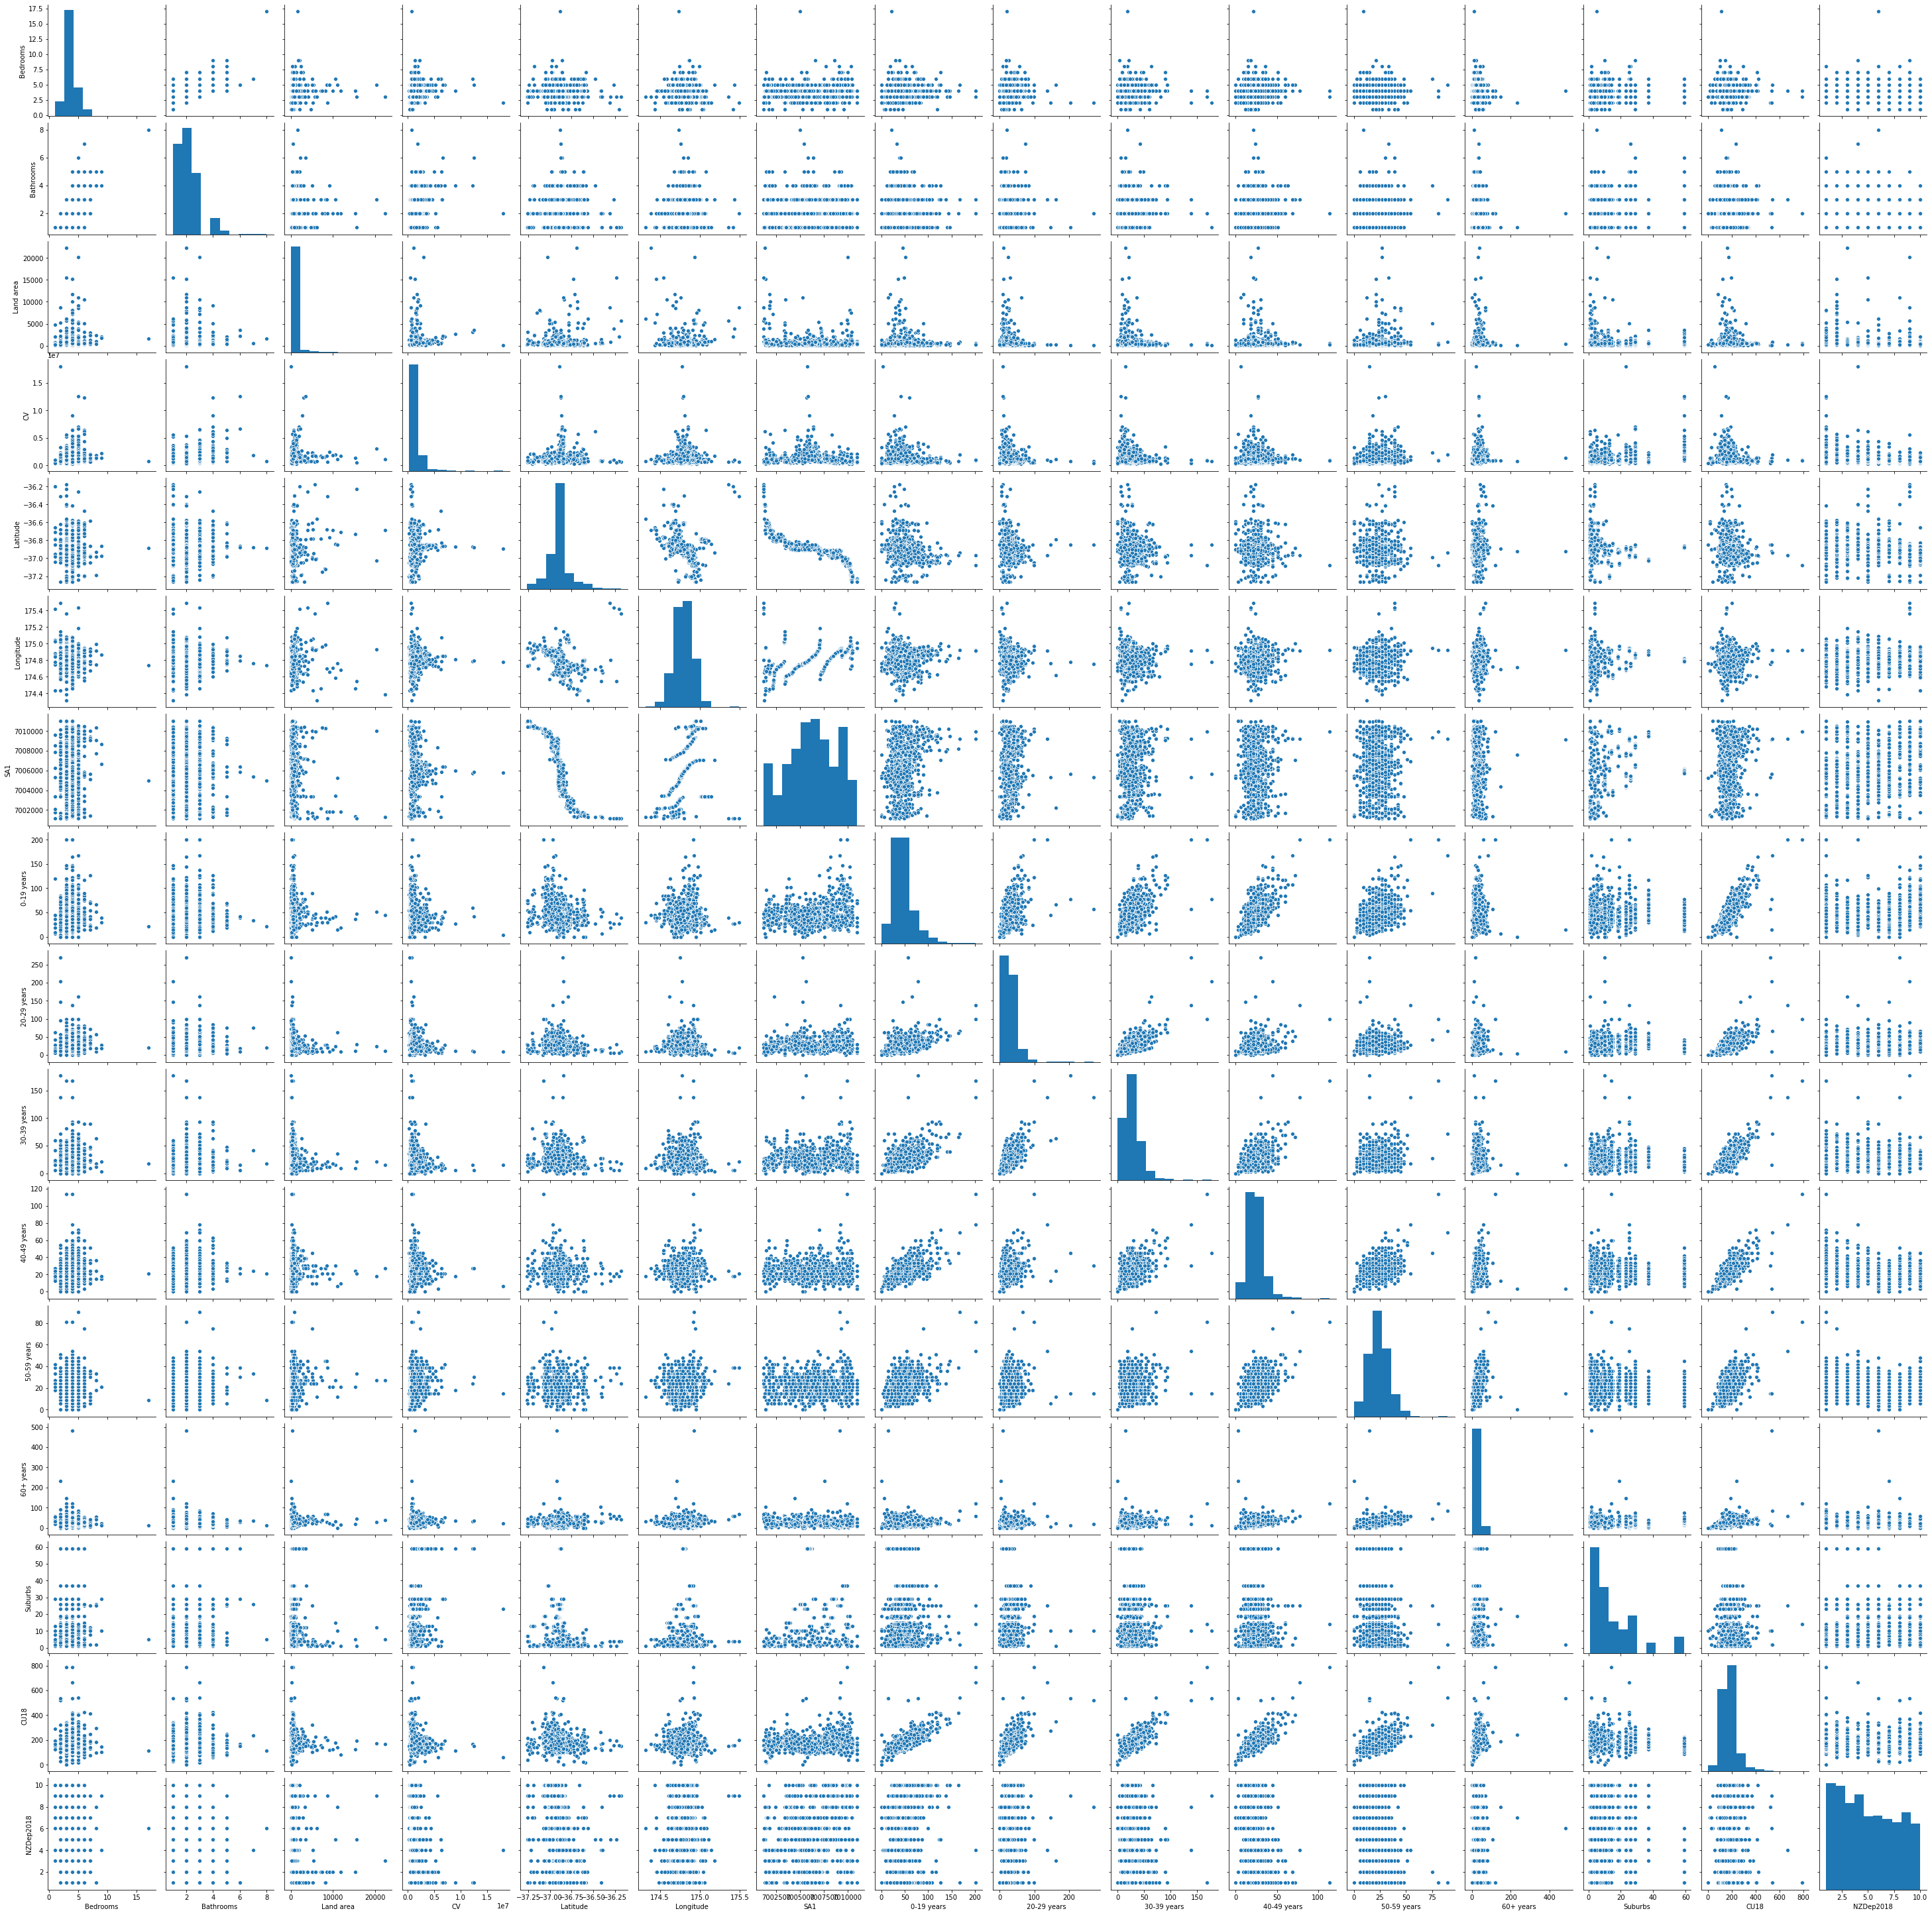

In [48]:
sns.pairplot(Df_encoded)

In [41]:
print(corrMatrix)

             Bedrooms  Bathrooms  Land area        CV  Latitude  Longitude  \
Bedrooms     1.000000   0.711510   0.083032  0.227730 -0.007214   0.009100   
Bathrooms    0.711510   1.000000   0.048496  0.371953  0.074865   0.045398   
Land area    0.083032   0.048496   1.000000  0.107736  0.153731  -0.034170   
CV           0.227730   0.371953   0.107736  1.000000  0.121358   0.018227   
Latitude    -0.007214   0.074865   0.153731  0.121358  1.000000  -0.310660   
Longitude    0.009100   0.045398  -0.034170  0.018227 -0.310660   1.000000   
SA1          0.032275  -0.044000  -0.115827 -0.110746 -0.868151   0.532154   
0-19 years   0.015988  -0.065296  -0.056324 -0.153487 -0.267936   0.089427   
20-29 years -0.049284  -0.059617  -0.107032 -0.180434 -0.161639  -0.044733   
30-39 years -0.059206  -0.050017  -0.132993 -0.211200 -0.165835  -0.021078   
40-49 years  0.029559   0.025905  -0.009241 -0.041978 -0.068533   0.024806   
50-59 years  0.049735   0.086032   0.124585  0.136555 -0.013526 

<h2>Part 2 -Data Analysis and Modelling</h2>

<h3>Patterns in Data</h3>

From the above co-relation table if we see co-relation of different features with our target variable CV, we can estimate that which features are the important features which influence the price of property. The negative corelation represent a inverse relation meaning that means if value for feature increases, the CV or price will increase and vice-versa.

<h4>Inferences And Analysis from Data</h4>

From our correlation table, different inferences about our data and pattern in it can be made. Some of these inferences which I observed are as follows -

1. Bedrooms/CV - The co-relation between Bedroom and CV is 0.227730. The positive correlation means that more the number of                      bedrooms, more the price of property which is an obvious thing.

2. Bathrooms/CV - The co-relation between Bathrooms and CV is 0.371953. Again, positive correlation represents a directly                         proportional relationship. More bathrooms more the price. Two bathrooms between 4 rooms is more convenient                       compared to one bathroom between 4 rooms.

3. Land Area/CV - The co-relation between Land Area and CV is 0.107736. This means that both are directly proportional and more                   the land area, more is the price.

4. Latitude/
   Longitude/CV - The co-relation between them and CV is positive and negative but these factors do not have a                                    influence on the prices of any property. Hence while fitting regression models on this data set,                                these columns can be dropped.
5. 0-19-..60
     years/ CV - For all the age groups also, there are different values of co-relation(mostly negative).                                        However age group have no significanct influence on prices of house. However, one observation from this data                    set is that if an area has high population of people below 40 years, the prices of properties are low. This is                  explained by the negative correlation (except for 50-59 yrs). The possible explanation for this is that young                    people have lower salaries and lesser savings compared to those in older age. Therefore, their population would                  be higher in areas which have low property prices. 

6. Suburbs/CV -  The co-relation between Suburbs and CV is 0.257042 which means that the suburb in which property is located                      effects the prices of it. And this is true observation in real world as well. Some properties are costly                        because they are located in a posh suburb
 

<h3> Model Fitting On Our Data set</h3>

In this section we fit some regression models on our data set and analyse their performance on our data set. 

We will drop some columns from our data set as discussed above. These columns will be dropped as they have very low or no influence on predicting the prices of our property. The columns which we are dropping are as follows:

Latitude, Longitude, SA1, 0-19, 20-29, 40-49, 50-59, 60+, CU18, Encode_suburb, Land Area



In [43]:
Df_encode_1 = Df_encoded.drop(['SA1', 'Latitude','Longitude','CU18','0-19 years','20-29 years','40-49 years','50-59 years','60+ years','Land area'], axis = 1) 

In [44]:
Df_encode_1.head()

,Bedrooms,Bathrooms,CV,30-39 years,Suburbs,NZDep2018
0,5,3.0,960000,24,37,6.0
1,5,3.0,1250000,12,14,1.0
3,6,4.0,1250000,12,14,1.0
5,2,1.0,740000,21,14,2.0
6,3,1.0,630000,33,3,9.0


In [45]:
from sklearn.model_selection import train_test_split, cross_val_score

Df_Targ = Df_encode_1.filter(['CV'], axis=1)

DF_Indp_Feat = Df_encode_1.loc[:, Df_encode_1.columns != 'CV']

pred_train, pred_test, tar_train, tar_test = train_test_split(DF_Indp_Feat, Df_Targ, test_size=.2)

In [46]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(pred_train,tar_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
reg.score(pred_test,tar_test)

0.2734824954808882